# Du NLP en Français 

Nous avons fait du NLP avec des datasets classiques et bien connus mais qu'en est il sur des dataset en français ? Voyons cela dans cet exercice

1. Importez les librairies nécessaires à la gestion de texte dans FastAi.

In [0]:
from fastai.text import *
import pandas as pd
import numpy as np

2. Importez le dataset *facebook_reviews_disneylandParis_format.csv*

In [0]:
from google.colab import files
uploaded = files.upload()

Saving facebook_reviews_disneylandParis_format.csv to facebook_reviews_disneylandParis_format (1).csv


KeyboardInterrupt: ignored

In [0]:
df=pd.read_csv("facebook_reviews_disneylandParis_format.csv")
df.head()

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
1,e3be4f9c9e0b9572bfb2a5f88497bb14,NaN,2,2017-09-29 17:29:00,17:29,17,Ven,NaN,NaN,2017-09,0,0
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
3,fa330e5891a1bb486c3e9bf95c098726,NaN,5,2017-09-29 15:52:00,15:52,15,Ven,NaN,NaN,2017-09,0,0
4,c1a693206aee1a2412d4bd9e45b80ec5,NaN,3,2017-09-29 15:29:00,15:29,15,Ven,NaN,NaN,2017-09,0,0


3. Dans le dataset, ne gardez uniquement les reviews laissées en français 

In [0]:
df=df[df.review_lang =="french"]
df.head()

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
11,726b1a3e2664e8b075129bcd643dbf56,En vacances en région parisienne nous nous som...,2,2017-09-29 00:37:00,00:37,0,Ven,en vacances en région parisienne nous nous som...,french,2017-09,172,25
12,8a71763fbb3da7436b957681b24cc404,Tropbeaufinalpleinlesyeuxoreil,5,2017-09-29 00:16:00,00:16,0,Ven,tropbeaufinalpleinlesyeuxoreil,french,2017-09,30,1
23,ce7abd7798ee036d667c0ad84b85daa7,L'univers Disney reste merveilleux. Toutefois ...,4,2017-09-28 20:24:00,20:24,20,Jeu,l univers disney reste merveilleux toutefois ...,french,2017-09,148,23


4. Nous n'avons besoin que des colonnes *review_format* et *stars*. Adaptez donc le dataset en fonction.

In [0]:
df=df[["review_format"]+["stars"]]
df.head()

,review_format,stars
0,génial fabuleux exceptionnel j aimerais qu...,5
2,toujours aussi magic féerique,5
11,en vacances en région parisienne nous nous som...,2
12,tropbeaufinalpleinlesyeuxoreil,5
23,l univers disney reste merveilleux toutefois ...,4


5. Séparez votre dataset en un training set et un test set

In [0]:
mask = np.random.randn(len(df)) < 0.80
train=df[mask]
test=df[~mask]
print(train.shape)
print(test.shape)

(6678, 2)
(1796, 2)


6. Créez maintenant un DataBunch adapté. Faites attention cependant, vous devrez utiliser un Tokenizer différent de celui par défaut. 

[Regardez la documentation en détail ](https://docs.fast.ai/text.transform.html#Tokenizer)

In [0]:
data=TextLMDataBunch.from_df(Path("model"),
                                 train_df=train,
                                 valid_df=test,
                                 text_cols="review_format",
                                 label_cols="stars",
                                 tokenizer=Tokenizer(lang="fr"))

7. Regarder un batch de données préprocessées

In [0]:
data.show_batch()

idx,text
0,moment l univers disney est très bien mis en scène très xxunk les spectacles nous mettent des etoiles pleins les yeux nous sommes venu en période de faible affluence minutes de queue pour les attractions les plus prisées je ne veux même pas imaginer l attente les jours de forte affluence quelques petits bémols par contre pirate des caraïbes ratatouille et le manoir hantée très souvent en panne et les
1,faire un acces direct au village surtout quand je vois ou agent de sécurité à la sortie du village qui ne font pas grand chose à part être xxunk sur les barrières payer de parking pour même pas une heure et ne pas avoir manger etre xxunk par des gens qui font la xxunk ou xxunk des tickets d entrée et bien nous ne vous disons pas à bientôt disneyland
2,c est certain xxbos malgré le temps j y ai passé une bonne journée de bonnes attractions de jolis décors du personnel très agréable par contre pour la restauration la prochaine fois j xxunk mon xxunk pique nique j ai testé les hot dogs hier et vu le prix cher voire très cher pour du simple hot dog frites je m attendais à mieux le prix des autres restaurants était
3,petit les prix des snacks et restau xxunk sont chère pour ce qu on mange et de h a h peut de manèges ouverts au final xxbos encore une fois une splendide journée avec pleins d étoiles dans les yeux de ma princesse xxbos trop monde alors trop d attente pour les attractions xxbos tout simplement magique comme d habitude xxbos après une heure de queue à l attraction ratatouille
4,incapable d attendre dans les file d attente mes enfants en sont ressorti heureux avec des etoiles pleins les yeux et de super souvenirs xxunk xxbos déçu de ne pas avoir vue la reine des neige ma fille de ans est fan de la princesse c est pour ça que nous sommes venus au parc xxbos séjour de jours au parc disneyland j ai adoré les temps d attente sont


# Predict next words

7. Créeons un language model learner qui va essayer de faire des prédictions de phrases à partir de mots que vous entrerez en input

In [0]:
learn=language_model_learner(data,AWD_LSTM)

8. Entrainez le modèle sur 3 epochs 

In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,7.499282,5.849823,0.073053,00:11
1,6.269642,5.496315,0.104043,00:12
2,5.865265,5.423751,0.117423,00:12


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,5.562538,5.135435,0.137537,00:17
1,5.201736,4.723043,0.168948,00:16
2,4.890713,4.520697,0.186607,00:16
3,4.683312,4.449045,0.193849,00:16
4,4.572552,4.437680,0.194965,00:16


In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-04
Min loss divided by 10: 6.31E-08


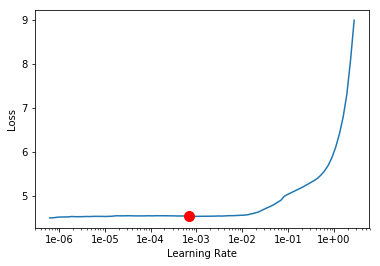

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(5,1.32E-06)

epoch,train_loss,valid_loss,accuracy,time
0,4.530139,4.437796,0.194754,00:16
1,4.532274,4.437721,0.194680,00:16
2,4.529160,4.437241,0.194953,00:16
3,4.527729,4.437516,0.194978,00:16
4,4.527511,4.437423,0.194928,00:16


9. Tentez de faire une prédiction des 10 prochains mots de la phrase : `J'aime disneyland parce que `

In [0]:
learn.predict("J'aime disneyland parce que",n_words=10)

"J'aime disneyland parce que j ai encore une bonne journée mais ces les attractions"

9b. Les résultats ne sont pas très concluants. Vous pouvez tenter d'entrainer le modèle sur plus d'epoch et vous rapprocher d'un résultat plus correct. Cependant, cela est très couteux en termes de temps. N'hésitez donc pas à sauter cette question si votre entrainement prend trop de temps. 

# Text classifier

10. On va essayer de faire une prédiction maintenant de la note qu'une personne a laissée en fonction de la reviews qu'elle a écrite. Créez donc un nouveau DataBunch adapté à cette problématique 

In [0]:
data_clas = TextClasDataBunch.from_df(Path("model"), 
                                      train_df = train, 
                                      valid_df = test,
                                      text_cols = "review_format",
                                      label_cols = "stars",
                                      tokenizer= Tokenizer(lang="fr"),
                                      vocab = data.train_ds.vocab
                                      )

11. Créez un modèle adapté 

In [0]:
learner=text_classifier_learner(data_clas,AWD_LSTM)

12. Entrainez votre modèle sur 3 epochs 

In [0]:
learner.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.419629,1.240180,0.566258,00:09
1,1.228711,1.329516,0.566258,00:09
2,1.183107,1.238115,0.566258,00:08


In [0]:
learner.unfreeze()

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


13. On va tenter de faire mieux. Entrainez votre modèle en effectuant du fine-tuning sur le learning rate 

Min numerical gradient: 2.29E-06
Min loss divided by 10: 1.00E-06


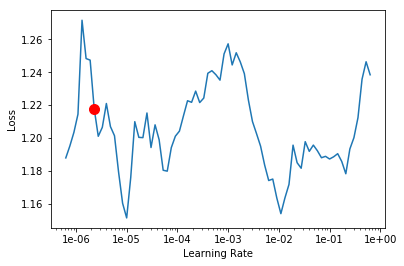

In [0]:
learner.recorder.plot(suggestion=True)

In [0]:
learner.fit_one_cycle(4,3.98E-06)

epoch,train_loss,valid_loss,accuracy,time
0,1.241166,1.264316,0.566258,00:22
1,1.201140,1.239289,0.566258,00:22
2,1.228584,1.251592,0.566258,00:19
3,1.243231,1.256533,0.566258,00:21


In [0]:
learner.unfreeze()
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.20E-06


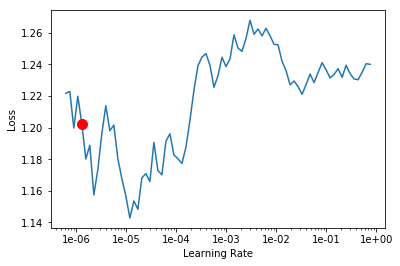

In [0]:
learner.recorder.plot(suggestion=True)

In [0]:
learner.fit_one_cycle(4,1.32E-06)

epoch,train_loss,valid_loss,accuracy,time
0,1.209597,1.242450,0.566258,00:18
1,1.200718,1.229438,0.566258,00:22
2,1.211026,1.237694,0.566258,00:21
3,1.212149,1.239807,0.566258,00:19


In [0]:
learner.fit_one_cycle(3,1.32E-03)

epoch,train_loss,valid_loss,accuracy,time
0,1.093972,1.033590,0.584076,00:18
1,0.944074,0.901889,0.647550,00:22
2,0.848474,0.881993,0.648107,00:22


In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.00E-06


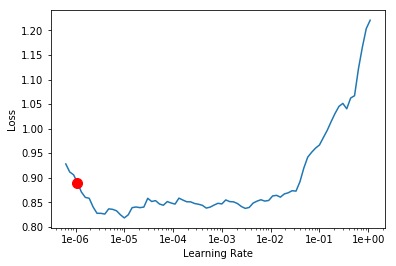

In [0]:
learner.recorder.plot(suggestion=True)

In [0]:
learner.fit_one_cycle(3,1.10E-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.842304,0.882295,0.654232,00:24
1,0.874119,0.883376,0.650891,00:19
2,0.826275,0.881584,0.655902,00:21


In [0]:
learner.fit_one_cycle(10,1.10E-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.853117,0.881843,0.652004,00:18
1,0.830052,0.894117,0.655345,00:20
2,0.853354,0.880503,0.655345,00:19
3,0.814543,0.880583,0.651448,00:23
4,0.847189,0.882391,0.655345,00:20
5,0.841659,0.881159,0.654788,00:21
6,0.803180,0.896250,0.653118,00:24
7,0.827848,0.881427,0.655345,00:22
8,0.820581,0.880386,0.659800,00:22
9,0.833754,0.879055,0.652561,00:22


In [0]:
learner.fit_one_cycle(5,1E-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.819463,1.518452,0.533408,00:21
1,0.794354,0.910063,0.649220,00:22
2,0.759251,0.895362,0.669822,00:21
3,0.667126,0.878647,0.659800,00:21
4,0.601528,0.880270,0.670379,00:22


14. Puisque nous sommes sur de la classification, tentons de voir ce que nous propose l'interpréteur : ```ClassificationInterpretation```

In [0]:
interp=ClassificationInterpretation.from_learner(learner)

15. Regardez la matrice de confusion pour voir où votre modèle s'est trompé 

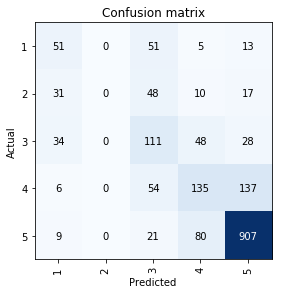

In [0]:
interp.plot_confusion_matrix()

16. Nous allons voir un autre interpréteur. Testez : ```TextClassificationInterpretation```

In [0]:
interp2=TextClassificationInterpretation.from_learner(learner)

17. Utilisez la méthode ```show_top_losses``` pour voir quelles sont les prédictions où le modèle s'est le plus trompé 

In [0]:
interp2.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
xxbos magnifique week end à refaire,5,5,6.85,0.92
xxbos franchement ce n est pas la première fois qu on y va mais cette fois ci je trouve ça cher payer pour avoir une grosse partie du parc fermée pour rénovation manèges magasin et restaurants marre d entendre que c est la période creuse et de plus on a pas pu voir l illumination sur le château mais ma du au brouillard dommage de dépenser aussi cher le spectacle,5,3,6.38,0.01
xxbos nous allons à disneyland paris une fois par an entre novembre et mars j aime y aller en famille pour le côté tous le monde xxunk et le monde est beau cette xxunk avec le monde réel et cette année nous xxunk cet désormais xxunk familiale pour deux jours hôtel bref la totale et là déception beaucoup moins de sourires des yeux qui se lèvent au xxunk quand nous,5,2,6.34,0.00
xxbos très jolies decos de noël avec des xxunk de neiges à l entrée du parc qui ont enchantés les enfants toujours trop de monde donc peu d attraction dans une journée et au prix du billet mais c est disney et les enfants ont adorés c est le principal,5,4,6.03,0.07
xxbos un xxunk manifique pour tous,5,5,5.99,0.97


18. Nous allons utiliser une autre méthode qui est : ```show_intrinsic_attention```. Insérez en input la première review de votre dataset et regardez le résultat. 

Que pouvez-vous dire ?

In [0]:
interp2.show_intrinsic_attention(df.iloc[0,0])

19. Tentez avec quelques autres reviews pour voir ce que propose votre modèle 

In [0]:
learner.predict("Trop de monstres qui font peur aux enfants")

(Category 1, tensor(0), tensor([0.4442, 0.2313, 0.2351, 0.0475, 0.0418]))

In [0]:
learner.predict("Nous avons bien aimé, mais c'est un peu trop cher pour ce que c'est")

(Category 3, tensor(2), tensor([0.0893, 0.1193, 0.3536, 0.3188, 0.1191]))